<div class="alert alert-success">
<b>Reviewer's comment V2</b>

You did a great job! The project is accepted. Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! For some reason the project breaks off just after the first task. Maybe you worked locally and accidentally uploaded the wrong file? If so, please try resubmitting.

# Project description
Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.

We have to train different models and evaluate them using cross-validation. Then to pick the best model and test it using the test sample.

In [1]:
from IPython.display import Image


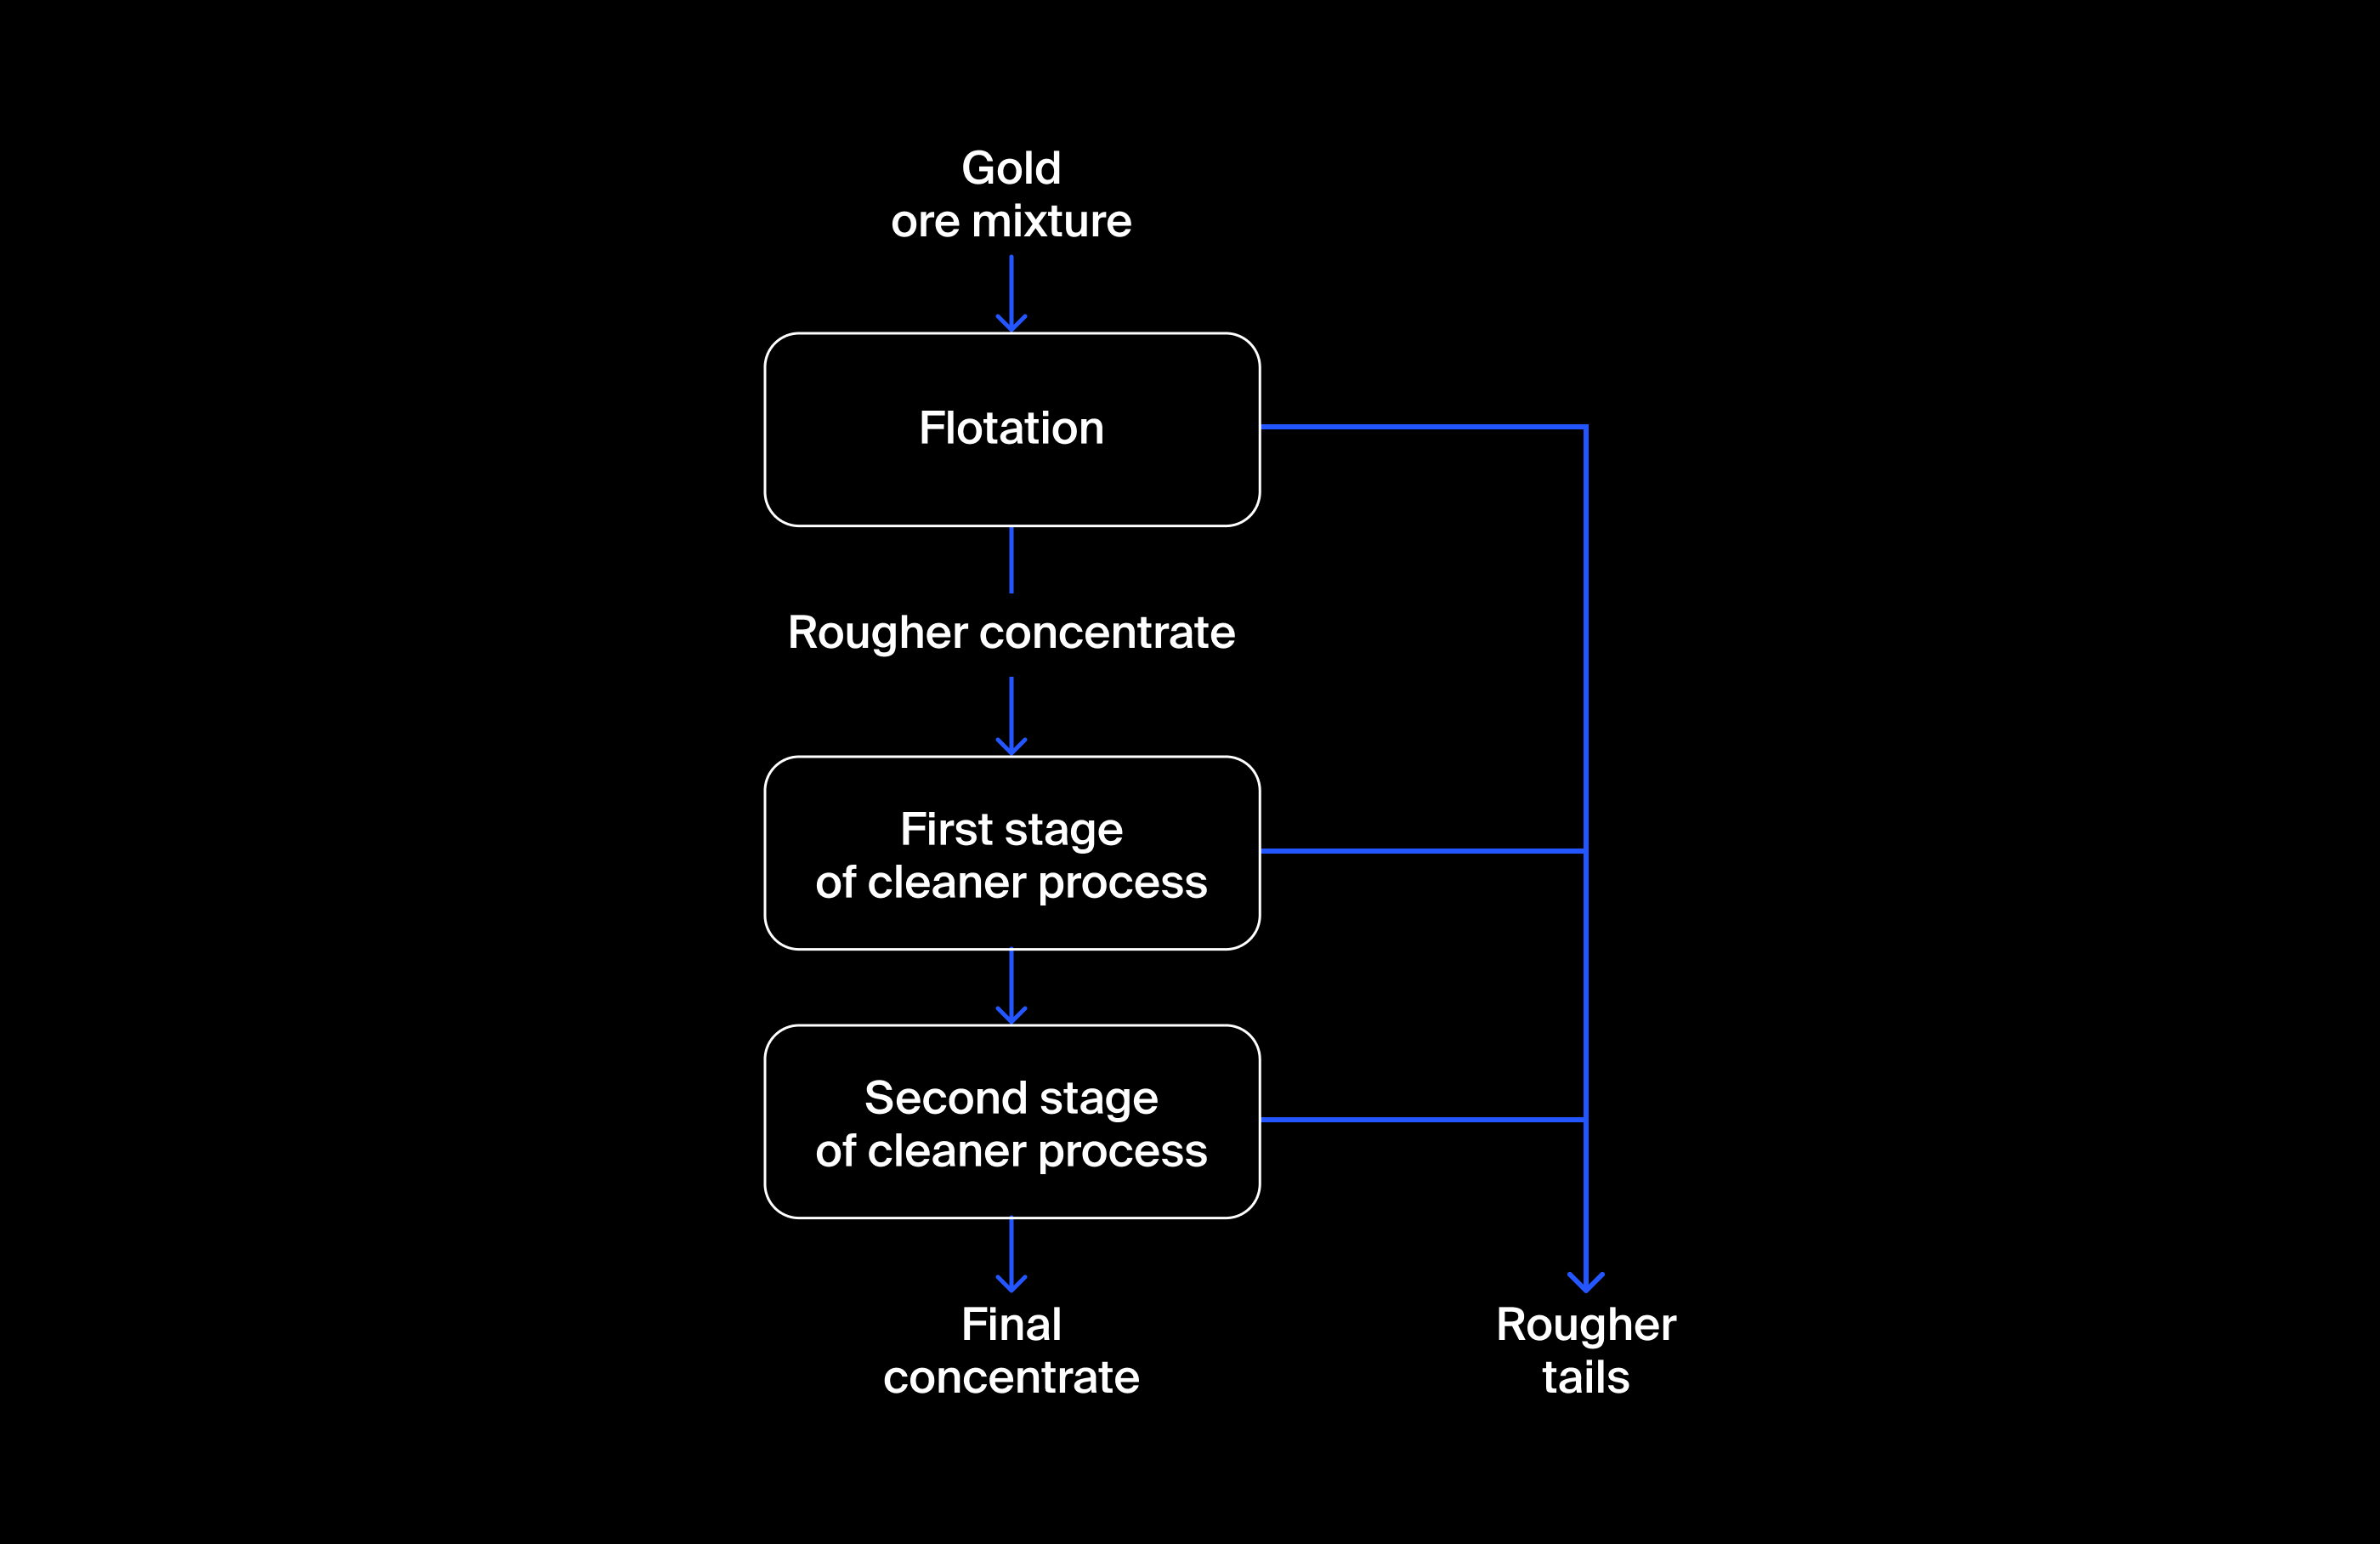

In [2]:
Image('https://pictures.s3.yandex.net/resources/viruchka_2_1589899167.jpg')

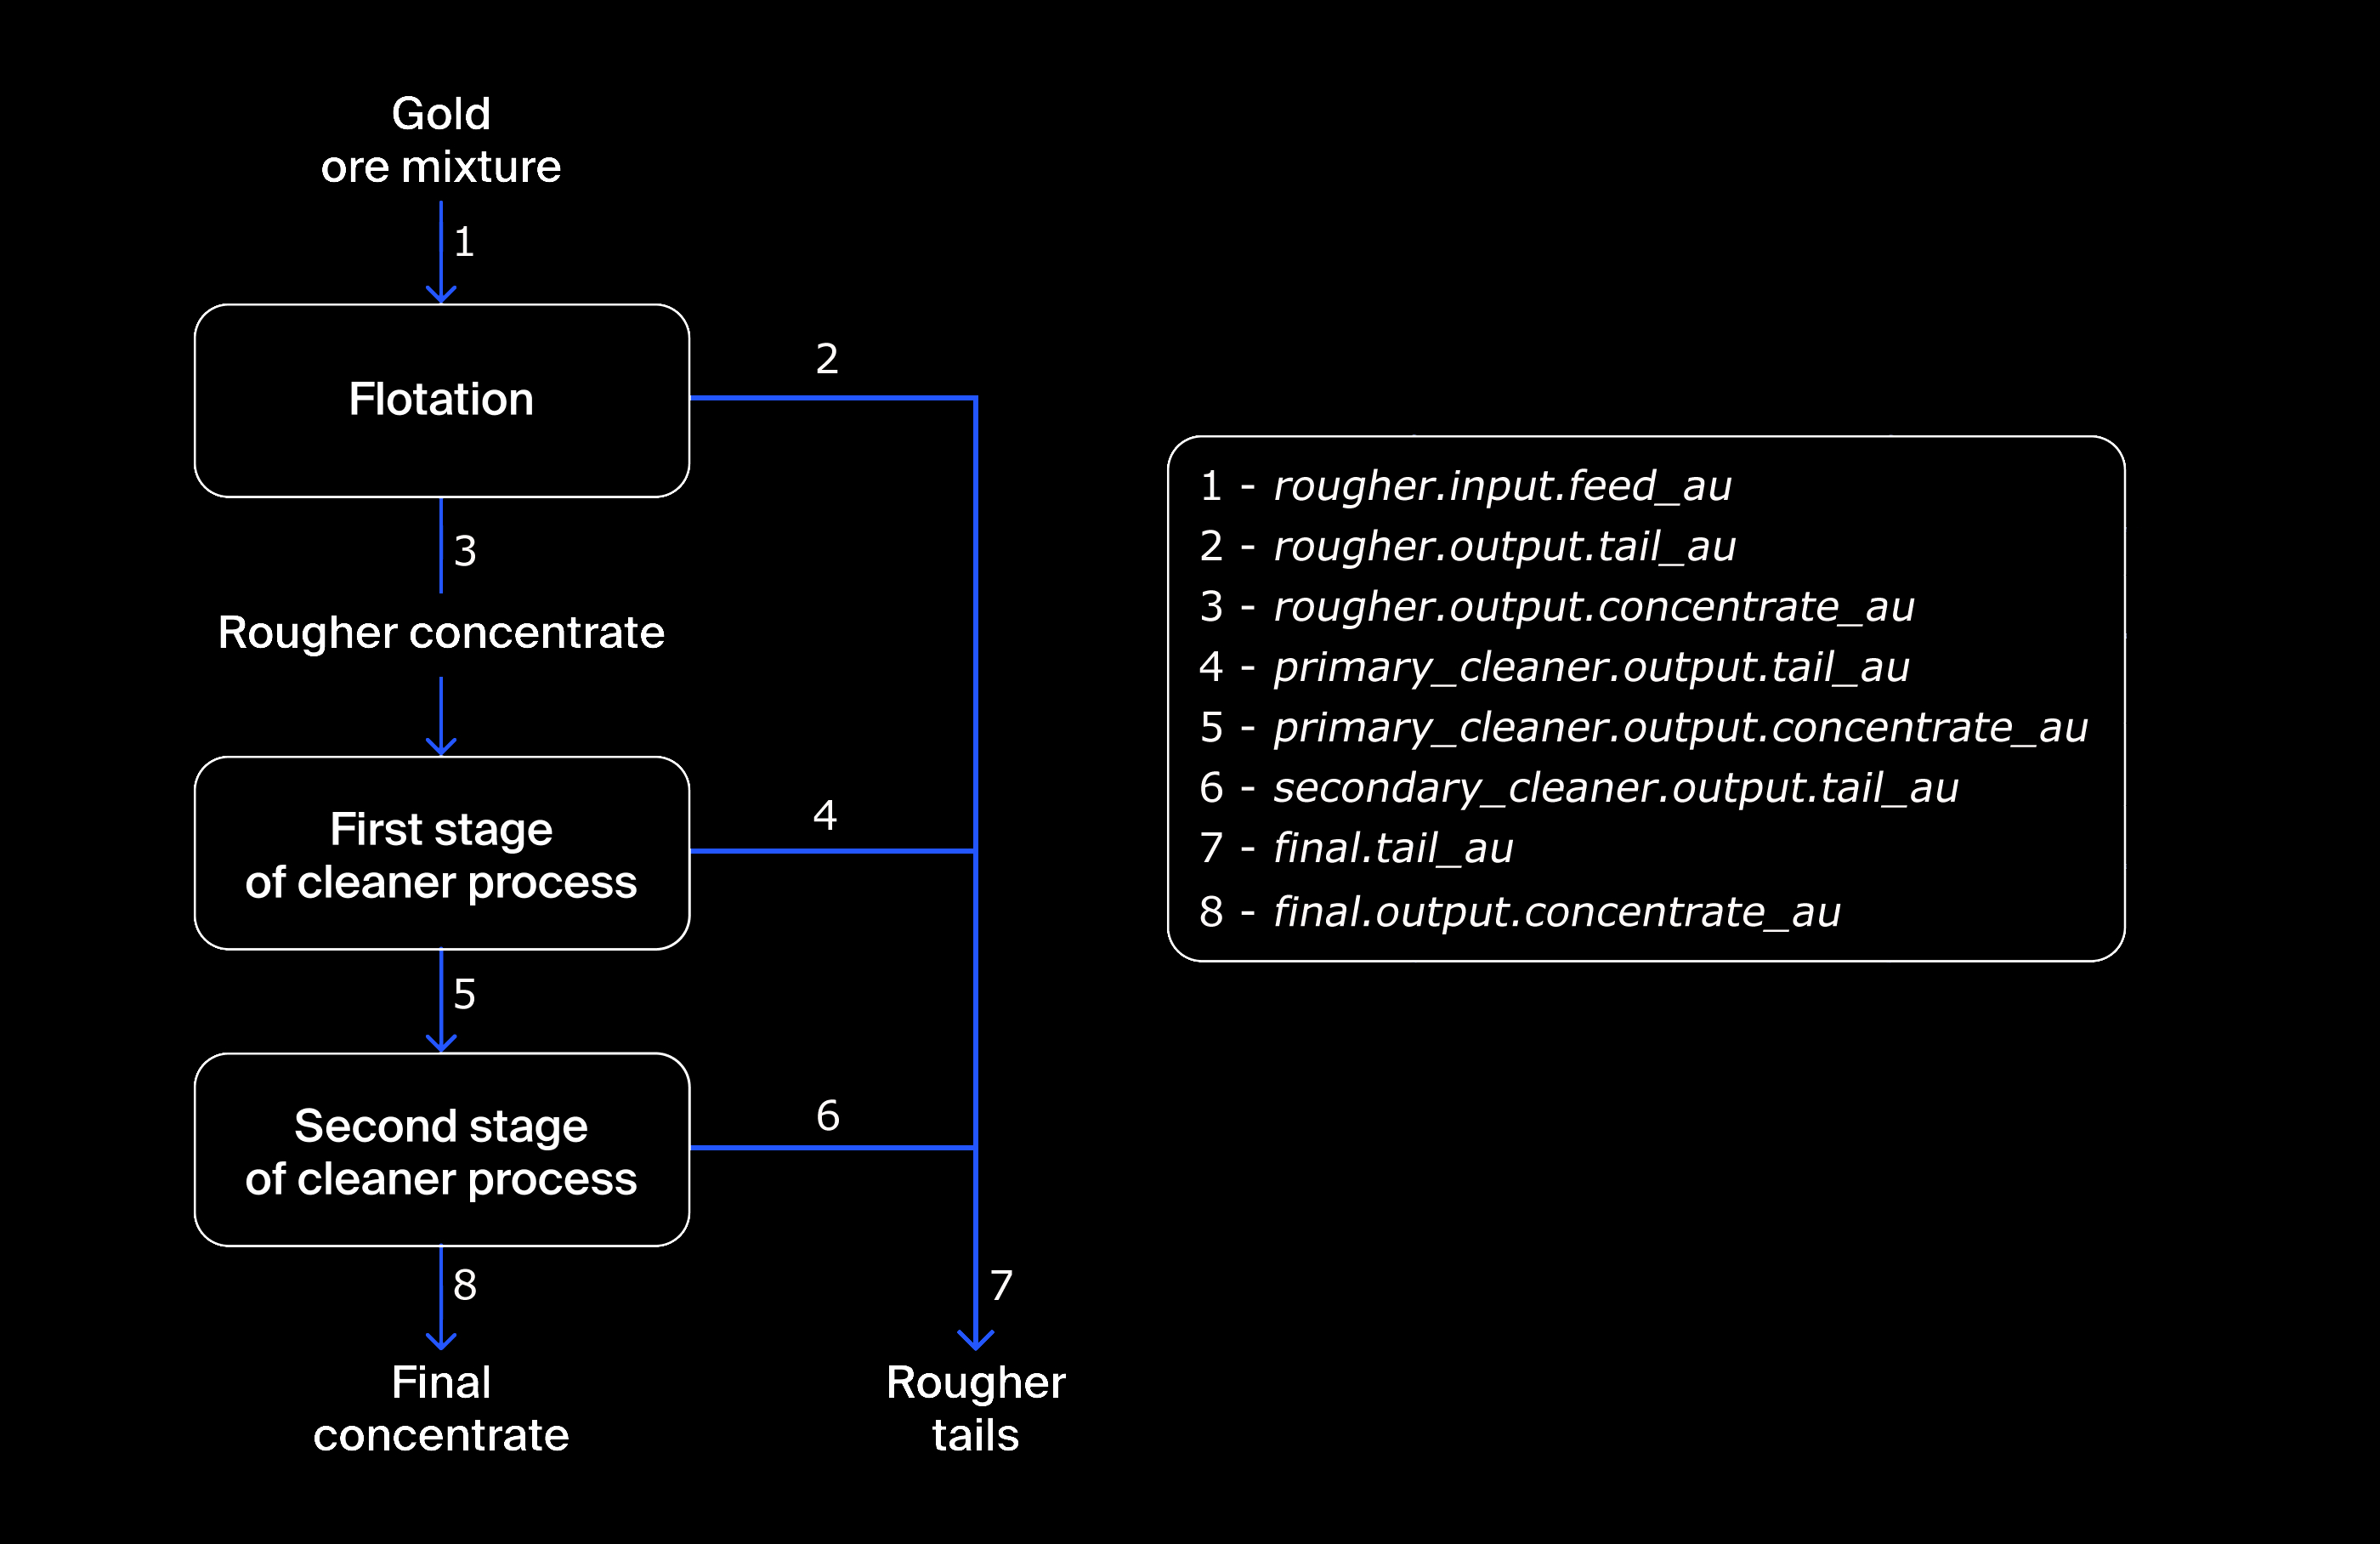

In [3]:
Image('https://pictures.s3.yandex.net/resources/ore_1591699963.jpg')

# The metric
sMAPE: similar to MAE, but is expressed in relative instead of absolute ones.

# The prediction

We need to predict two values:

- rougher concentrate recovery: rougher.output.recovery
- final concentrate recovery: final.output.recovery

# Project instructions

In [4]:
# update libraries
!pip install pandas -U
!pip install scikit-learn -U
!pip install seaborn -U

  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'installed-files.txt'
Consider using the `--user` option or check the permissions.

  Using cached scikit_learn-1.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission de

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from numpy.random import RandomState
from pprint import pprint

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# definitions
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
state = RandomState(12345)
#state = np.random.RandomState(12345)
pd.set_option('display.max_colwidth', None)

In [3]:
# delete error messages
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Open the data file and study the general information
# Read the data

In [4]:
df_train = pd.read_csv("/datasets/gold_recovery_train.csv", sep=",")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv", sep=",")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv", sep=",")
df_train.name = 'gold_recovery_train'
df_test.name = 'gold_recovery_test'
df_full.name = 'gold_recovery_full'

# Check that recovery is calculated correctly.

Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

# Recovery calculation

Where

C - share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery) df_train['rougher.output.concentrate_au']
F - share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery) df_train['rougher.input.feed_au']
T - share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery) df_train['rougher.output.tail_au']

In [5]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


In [6]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']
df_train['recovery_calculation'] = (c*(f-t)) / (f*(c-t)) * 100

In [7]:
df_train[['rougher.output.recovery', 'recovery_calculation']]

,rougher.output.recovery,recovery_calculation
0,87.11,87.11
1,86.84,86.84
2,86.84,86.84
3,87.23,87.23
4,86.69,86.69
...,...,...
16855,89.57,89.57
16856,87.72,87.72
16857,88.89,88.89
16858,89.86,89.86


# Calculate MAE

In [8]:
# Checking MAE with my calculation
mae = (df_train['recovery_calculation'] -
       df_train['rougher.output.recovery']).abs().mean()
print(f'Mean Absolute Error is {mae}')

Mean Absolute Error is 9.303415616264301e-15


**conclusion:** We can trust the **rougher.output.recovery**  as it is almost identical to our calculation and the MAE is VERY small.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully! When working with floating point numbers, it rarely makes sense to seek strict equality between two floating point variables ([why?](https://0.30000000000000004.com/))

</div>

**Analyze the features not available in the test set. What are these parameters? What is their type?**

Some parameters are not available because they were measured / calculated later. For that reason that some of the features present in the training data set may be absent from the test data set. The test set doesn't contain targets too.

In [9]:
missing_col = list(set(df_train.columns) - set(df_test.columns))
sorted(missing_col)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calculation',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail

In [10]:
print(f'Number of missing columns in the test data is {len(missing_col)-1}')
print('The missing colums are all the output and calculation')

Number of missing columns in the test data is 34
The missing colums are all the output and calculation


Number of missing columns in the test data is 34
The missing colums are all the output and calculation
The missing columns are all of output and calculation, probably because these data was not available at time of the process.

To avoid information leakage, we will not use these features

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right!

</div>

# **Data preprocessing**

We have to make sure the same features are available both on the train (in order to build the model) and in the test (so we can validate the model

In [11]:
train_test_columns = list(
    set(df_train.columns).intersection(set(df_test.columns)))
train_test_columns

['secondary_cleaner.state.floatbank2_b_level',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_d_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'date',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_d_level',
 'secondary_cleaner.state.floatbank3_b_level',
 'rougher.state.floatbank10_e_level',
 'rougher.input.feed_au',
 'rougher.input.feed_rate',
 'secondary_cleaner.state.floatbank2_a_level',
 'rougher.input.feed_pb',
 'rougher.state.floatbank10_a_air',
 'primary_cleaner.state.floatbank8_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'rougher.input.feed_sol',
 'primary_cleaner.input.depressant',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank3_a_level',
 'primary_cleaner.state.floatbank8_a_air',
 'secondary_cleaner.state.floatbank3_a_air',
 'rougher.input.feed_ag',
 'primary_cleaner.state.floatbank8_a_level',
 'rougher.state.floatbank10_e_air',
 'seco

In [12]:
print(
    f'Number of colums in both the train ad the test are: {len(train_test_columns)}')

Number of colums in both the train ad the test are: 53


**conclusion:** just before running the models, we will delete all the columns of features in the train data set to make it equal to the test data set

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

# **Checking for duplicates**


In [13]:
print(f'Number of duplicates in df_train is {df_train.duplicated().sum()}')
print(f'Number of duplicates in df_test is {df_test.duplicated().sum()}')

Number of duplicates in df_train is 0
Number of duplicates in df_test is 0


**conclusion:** No duplicate data in both data sets: train and test

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great!
    

</div>

# Checking missing values

# To use the proximity of the time to fill the missing values

In [14]:
# Change the type of date
# train
df_train['date'] = pd.to_datetime(df_train['date'])
df_train = df_train.sort_values('date')
# test
df_test['date'] = pd.to_datetime(df_test['date'])
df_test = df_test.sort_values('date')

In [15]:
(df_train.loc[:, train_test_columns].isnull().sum()/df_train.loc[:,
 train_test_columns].shape[0]).sort_values(ascending=False)*100

rougher.input.floatbank11_xanthate           11.29
primary_cleaner.input.sulfate                 7.75
primary_cleaner.input.depressant              7.49
rougher.input.floatbank10_sulfate             6.19
primary_cleaner.input.xanthate                5.84
rougher.input.floatbank11_sulfate             3.70
rougher.state.floatbank10_e_air               3.58
rougher.input.feed_rate                       3.04
rougher.input.feed_size                       2.47
secondary_cleaner.state.floatbank2_a_air      2.15
rougher.input.floatbank10_xanthate            2.05
rougher.input.feed_sol                        1.73
rougher.input.feed_pb                         1.35
secondary_cleaner.state.floatbank2_b_air      0.92
secondary_cleaner.state.floatbank4_a_air      0.77
secondary_cleaner.state.floatbank4_a_level    0.67
secondary_cleaner.state.floatbank3_a_level    0.67
secondary_cleaner.state.floatbank2_b_level    0.66
secondary_cleaner.state.floatbank3_b_level    0.65
secondary_cleaner.state.floatba

In [16]:
print(
    f'Number of rows with NaN in the train is \t{df_train.isnull().any(axis=1).sum():,}')
print(
    f'Number of rows with NaN in the test is \t\t{df_test.isnull().any(axis=1).sum():,}')

Number of rows with NaN in the train is 	5,843
Number of rows with NaN in the test is 		473


# replacing missing values

In [17]:
# train
df_train.loc[:, train_test_columns].fillna(method='ffill', inplace=True)
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_calculation
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84,87.11
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79,86.84
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43,86.84
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00,87.23
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50,86.69


In [18]:
# test
df_test.loc[:, train_test_columns].fillna(method='ffill', inplace=True)
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,"1,398.98",-500.23,"1,399.14",-499.92,"1,400.10",...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,"1,398.78",-500.06,"1,398.06",-499.78,"1,396.15",...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,"1,398.49",-500.87,"1,398.86",-499.76,"1,398.08",...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,"1,399.62",-498.86,"1,397.44",-499.21,"1,400.13",...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,"1,401.27",-500.81,"1,398.13",-499.50,"1,402.17",...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


conclusion: in order to handle the missing values, we can use several methods:

- we can drop the missing values
- we can fill them with the mean of the feature missing. But take care of data leakage and take the mean only from the train data set.
- we can use the timedate (sorted) and use forward or backward fill as we where told in the description of the project that values are close by the hour they were recorded.
Because of the amount of missing values, we decided not to delete them but to replace the NaN with the ffill option.

What we did:

1. sort the data by the date column
2. fill the train and test dataframe rows missing values using previous row values (with the option ffill)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Missing values were dealt with reasonably (note that forward fill is not always appropriate, but in this case it is, because we know that values close in time should be similar)

</div>

# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [19]:
metals = {'_au': 'Gold', "_ag": 'Silver', '_pb': 'Lead'}

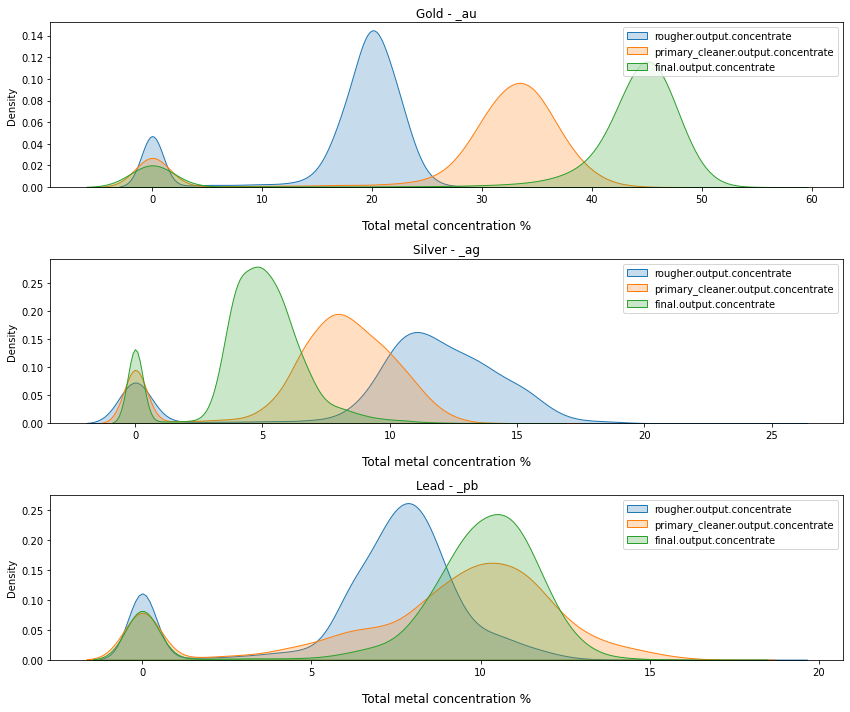

In [20]:

# Using three kinds of metals: gold, silver and lead
columns = ['rougher.output.concentrate',
           'primary_cleaner.output.concentrate', 'final.output.concentrate']

fig = plt.figure(figsize=(12, 10))
for i, metal in enumerate(metals.keys()):
    for col in columns:
        plt.subplot(3, 1, i+1)
        sns.kdeplot(df_train[col+metal], label=col, fill=True)
    plt.title(metals[metal]+' - '+metal)
    plt.xlabel('Total metal concentration %', fontsize=12, labelpad=15)
    plt.legend()

plt.tight_layout()
plt.show()

On the **gold** we can see the purification process is working and in every phase of the process the concentration of the gold is increasing.

For the **silver** and the **lead**, the results are not so good. actually the concentration doesn't rise as the process continue.

We notice a lot of outliers in the 0.0 place. These outliers should be deleted

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right, that makes sense!
    
</div>

# Compare the feed particle size distributions in the training set and in the test set

**Compare the feed particle size distributions in the training set and in the test set** 

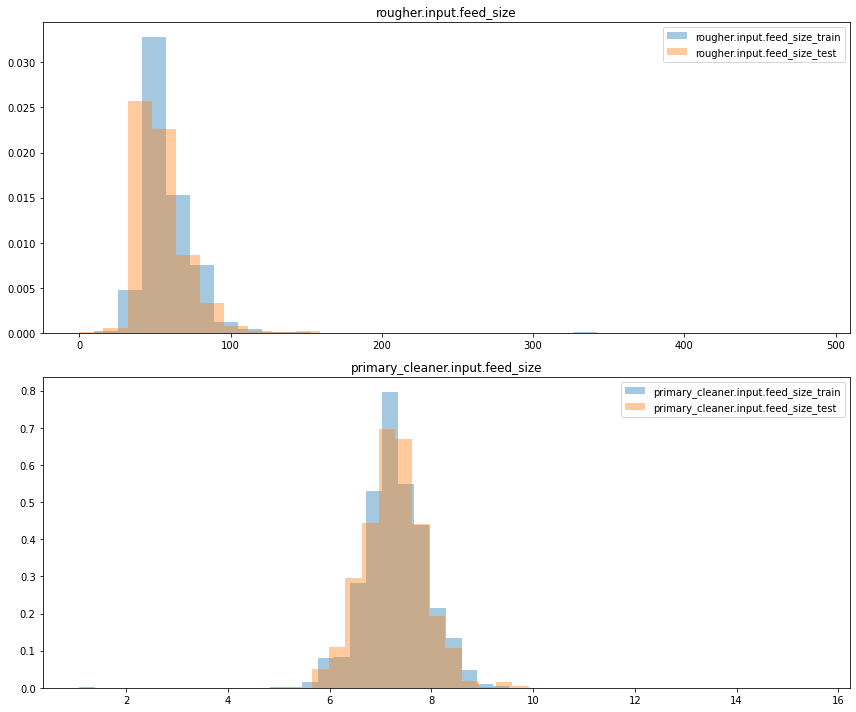

In [21]:
columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(12, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 1, i+1)
    plt.hist(df_train[col], bins=30, label=col+'_train', alpha=0.4, density=1)
    plt.hist(df_test[col], bins=30, label=col+'_test', alpha=0.4, density=1)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

**conclusion:** by checking visually, the particle size distributions looks the same between the train and the data. To be absolutely sure we need to test the hypothesis by Mann-Whitney U Test.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Particle size distributions were compared successfully!

</div>

# Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate

In [22]:
# function to gettotal concentration
def metal_concen_sum(df, stage):
    metal_handles = list(metals.keys())
    total_concen = df[stage+metal_handles[0]] + \
        df[stage+metal_handles[1]]+df[stage+metal_handles[2]]
    return total_concen

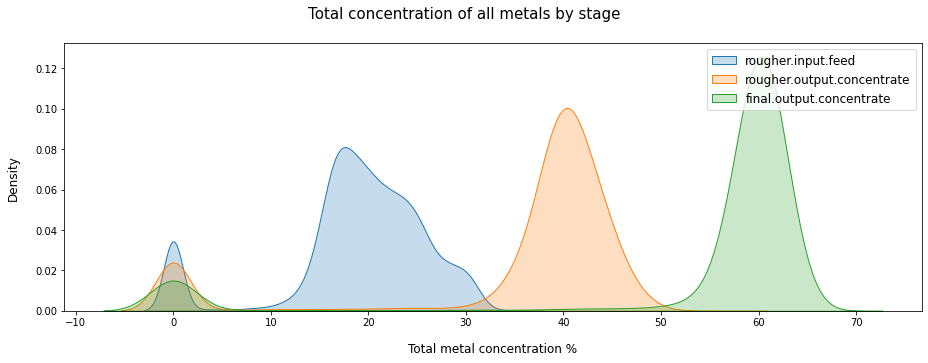

In [23]:
# plot of concentration of all metals in the stages
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total concentration of all metals by stage', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(df_full, 'rougher.input.feed'),
            label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'rougher.output.concentrate'),
            label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'final.output.concentrate'),
            label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total metal concentration %', fontsize=12, labelpad=15)
plt.ylabel('Density', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()

conclusion: We can see that the concentration of all the metals together is going up as the stage advance. We can also notice the outliers here, around the 0.0

# Dealing with outliers

In [24]:
# checking how many rows BEFORE deleting the outliers
print(
    f'Number of rows before deleting is: {df_train["rougher.output.recovery"].shape[0]:,}')

Number of rows before deleting is: 16,860


In [25]:
# for train
# making the values smaller than 0.01 to NaN
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate',
           'primary_cleaner.output.concentrate', 'final.output.concentrate']

for i, metal in enumerate(metals):
    for col in columns:
        df_train[df_train[col+'_'+metal] < 0.01] = np.nan

for col in ['final.output.recovery', 'rougher.output.recovery']:
    df_train[df_train[col] < 0.01] = np.nan

In [26]:
# deleting all the NaN we inplanted in the train data set
df_train.dropna(subset=['final.output.recovery',
                'rougher.output.recovery'], inplace=True)

In [27]:
df_train.dropna(subset=train_test_columns, inplace=True)

In [28]:
# checking how many rows AFTER deleting the outliers
print(
    f'Number of rows after deleting is: {df_train["rougher.output.recovery"].shape[0]:,}')

Number of rows after deleting is: 12,302


In [29]:
# Checking
df_train.loc[:, train_test_columns].isnull().sum().sort_values(ascending=False)

secondary_cleaner.state.floatbank2_b_level    0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_xanthate            0
secondary_cleaner.state.floatbank6_a_level    0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
secondary_cleaner.state.floatbank3_b_air      0
rougher.input.feed_size                       0
rougher.state.floatbank10_a_level             0
primary_cleaner.state.floatbank8_d_air        0
rougher.input.floatbank11_sulfate             0
secondary_cleaner.state.floatbank4_a_air      0
primary_cleaner.input.xanthate                0
rougher.state.floatbank10_c_air               0
secondary_cleaner.state.floatbank4_a_level    0
rougher.input.floatbank10_sulfate             0
primary_cleaner.state.floatbank8_b_level      0
rougher.state.floatbank10_d_air               0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank2_b_air      0
rougher.state.floatbank10_f_level       

No missing values anymore in train

<div class="alert alert-success">
<b>Reviewer's comment</b>

Abnormal values were detected and removed!

</div>

# adding final and rougher output.recovery columns from the full data frame to the test data frame by the date

In [30]:
# converting the type of 'date' to datetime
df_full['date'] = pd.to_datetime(df_full['date'])

In [31]:
# merging the missing tragets to the test from the full
df_test = df_test.merge(
    df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], how='left', on='date')

In [32]:
# for test
# making the values smaller than 0.01 to NaN
for col in ['final.output.recovery', 'rougher.output.recovery']:
    df_test[df_test[col] < 0.01] = np.nan

In [33]:
# deleting all the NaN we implanted in the test data set on the targets
df_test.dropna(subset=['final.output.recovery',
               'rougher.output.recovery'], inplace=True)

In [34]:
# deleting all the NaN we implanted in the test data set on the features
df_test.dropna(subset=train_test_columns, inplace=True)

In [35]:
# Checking
df_test.isnull().sum().sort_values(ascending=False)

date                                          0
secondary_cleaner.state.floatbank3_b_air      0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

No missing values anymore in test

<div class="alert alert-success">
<b>Reviewer's comment</b>

Targets were merged with the test set correctly

</div>

# Divide the targets and features

In [36]:
target = ['rougher.output.recovery', 'final.output.recovery']
features = [col for col in train_test_columns if col != 'date']

Dividing

In [37]:
# Divide to 4 files: features_train, features_test, target_train, target_test
features_train, features_test = df_train[features].values, df_test[features].values
target_train, target_test = df_train[target].values, df_test[target].values

Scaling

In [38]:
# create MinMax scaler
scaler = MinMaxScaler()

# scaling
features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.transform(features_test))

In [39]:
features_train_uscaled = features_train.copy()
features_test_uscaled = features_test.copy()
features_train = features_train_scaled
features_test = features_test_scaled

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Strictly speaking, applying scaling to the whole train set used for cross-validation is incorrect. The proper way is to apply scaling in each cross-validation fold separately to avoid data leakage. The easiest way to do it is to use [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

</div>

We normalized all the features in the train and transform it to the train and to the test.

MinMax gives value in range 0 to 1

# Build the model

# Write a function to calculate the final sMAPE value

In [40]:
def smape1(y_true, y_pred):
    return (np.abs(y_true-y_pred)/((np.abs(y_true)+np.abs(y_pred))/2)).mean()*100

In [41]:

def smape_final(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    return 0.25*smape1(true_rough, predicted_rough)+0.75*smape1(true_final, predicted_final)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Functions for SMAPE calculation are correct

</div>

In [42]:
y_train, y_test = target_train, target_test
X_train, X_test = features_train, features_test

# Train and evaluate Regression models

In [43]:
# GridSearchCV
smape = make_scorer(smape_final, greater_is_better=False)

# train and fit models


def train_fit_score(model, params, name):
    model = GridSearchCV(model, param_grid=params, cv=5,
                         scoring=smape, refit=True, n_jobs=-1)
    model.fit(X_train, y_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best score', 'Best parameters'])

<div class="alert alert-success">
<b>Reviewer's comment</b>

Scoring object is initialized correctly!

</div>

In [44]:
%%time
# Decision Tree
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), {'max_depth': range(
    5, 25, 5), 'min_impurity_decrease': np.arange(0.01, 0.2, 0.02), 'min_samples_split': range(2, 10, 2)}, 'Decision Tree')
DecisionTree

CPU times: user 4min 59s, sys: 363 ms, total: 4min 59s
Wall time: 5min


,Estimator,Best score,Best parameters
0,Decision Tree,9.08,"{'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 2}"


In [45]:
total_score = DecisionTree.copy()

In [46]:
%%time
# Linear regressor
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')
LinearRegressor

CPU times: user 536 ms, sys: 563 ms, total: 1.1 s
Wall time: 1.02 s


,Estimator,Best score,Best parameters
0,Linear Regressor,9.48,{}


In [47]:
total_score = pd.concat([total_score, LinearRegressor])

In [48]:
%%time
# Lasso Regressor
LassoRegressor = train_fit_score(Lasso(random_state=12345), {
                                 'alpha': np.arange(0.01, 1, 0.05)}, "Lasso Regressor")
LassoRegressor

CPU times: user 10.4 s, sys: 12.4 s, total: 22.8 s
Wall time: 22.8 s


,Estimator,Best score,Best parameters
0,Lasso Regressor,8.26,{'alpha': 0.11}


In [49]:
total_score = pd.concat([total_score, LassoRegressor])

In [50]:
%%time
# Random forest
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345), {'n_estimators': range(10, 110, 25), 'max_depth': range(
    5, 45, 10), 'min_impurity_decrease': np.arange(0.05, 0.25, 0.1), 'n_jobs': [-1]}, 'Random Forest')
RandomForest

CPU times: user 29min 59s, sys: 2.81 s, total: 30min 2s
Wall time: 30min 6s


,Estimator,Best score,Best parameters
0,Random Forest,8.03,"{'max_depth': 25, 'min_impurity_decrease': 0.15000000000000002, 'n_estimators': 60, 'n_jobs': -1}"


In [51]:
total_score = pd.concat([total_score, RandomForest])

In [52]:
# display all
display(total_score.drop('Best parameters', axis=1).sort_values(by='Best score'))

,Estimator,Best score
0,Random Forest,8.03
0,Lasso Regressor,8.26
0,Decision Tree,9.08
0,Linear Regressor,9.48


<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a couple of models and tuned their hyperparameters using a cross-validated grid search with our target metric

</div>

# Using the model on the test data

In [53]:
best_model = RandomForestRegressor(
    max_depth=15, min_impurity_decrease=0.15, n_estimators=60).fit(X_train, y_train)

In [54]:
rfr_smape = smape_final(y_test, best_model.predict(X_test))
print(
    f'sMAPE score for RandomForestRegressor with best hyperparameters is: {rfr_smape:.2f}')

sMAPE score for RandomForestRegressor with best hyperparameters is: 8.16


**conclusion:** As expected, the score of the test data is lower (sMAPE higher) than the train data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was evaluated on the test set

</div>

# Check score against sanity model

In [55]:
smape_mean_test = smape_final(y_test, np.tile(
    np.mean(y_train, axis=0), (len(y_test), 1)))
print(f'sMAPE score for the average (sanity check) is: {smape_mean_test:.2f}')

sMAPE score for the average (sanity check) is: 7.68


The sanity check score is a little bit better than of the Random Forest

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, there is a comparison with a simple constant baseline

</div>


# Conclusion

In this project we got data of gold production process. From ore to gold. We can show the process in the introduction.

We got three files, one for train the model, another for test and one that includes all the data. As we examined the files, we noticed that not all the features are included in the test data. In order to make models that can be tested, we need that the columns in the train set and in the data set will be the same.

To address this problem, we used only columns that common to the train and the test data sets.

We checked the output (target) of the data set by calculating the recovery. We found out that the data on the data sets is accurate.

We checked for duplicates - we found none.

We checked for missing values and found that there are not neglectable amount of missing values. To address the missing values, we used the information that the data is $Parameters that are next to each other in terms of time are often similar.* and fill the train and test data frames rows missing values using previous row values (with the option ffill).

We checked the concentration of gold and other metals as the purification process go on and noticed outliers around 0.0% concentration, with we deleted.

We normalized the features using the MinMax and train five models.

We used for scoring the function of sMAPE that was given to us by the gold industry.

We used GridSearchCV to optimize hyperparemeters of all five models we tried: Decision Tree, Linear Regressor, Lasso Regressor, KNNeighbors and Random Forest. This function helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters, using the Cross-Validation method.

After comparing the models by the sMAPE, the best model (lowest sMAPE) was Random Forest scoring 8.02 with the best hyper parameters. We use it to check the score of the test data with the same parameters and we got 8.11 witch is close to the score of the train data. One last check we made is getting the score of dummy regressor that return the average. This gave us score of 7.68 witch is better than the model.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right, so in the end our model turned out worse than a simple constant model. What does that mean? There could be various reasons for this. Maybe the data is of poor quality, maybe there are some hidden variables which determine the target, but we don't have access to them. 

</div>